In [1]:
import numpy as np
import os

import tensorflow as tf

from fcn import FCN
from training_utils import R2_CHs,Random_Imaging,plot_debug

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

There are 3 functions used to visualize the results:

- **plot_curves**: function to plot the learning curves of the mean squared error (MSE) loss and R2

    Parameters:

    - **folder**: folder of the considered case where training and test results are saved
    - **first_epoch,last_epoch**: first and last epochs to consider when plotting


- **plot_prediction**: function to visualize a prediction for a training/test image

    Parameters:
    
    - **img**: input HRTEM image
    - **lbl**: colum heights labels (ground truth)
    - **pred**: network's prediction


- **make_model**: function to define the model from the imported FCN neural network

    Parameters:
    
    - **FCN**: neural network imported from **fcn.py**
    - **input_shape**: shape of the input images ((256,256) in this case)

In [2]:
def plot_curves(folder,first_epoch,last_epoch):
    
    train_loss = np.load(folder + '/training_results/learning_curve/train_loss_learning_curve.npy',allow_pickle=True)
    test_loss = np.load(folder + '/test_results/learning_curve/test_loss_learning_curve.npy',allow_pickle=True)
    
    training_r2 = np.load(folder + '/training_results/learning_curve/train_r2_learning_curve.npy',allow_pickle=True)
    test_r2 = np.load(folder + '/test_results/learning_curve/test_r2_learning_curve.npy',allow_pickle=True)
    
    epochs = np.arange(first_epoch + 1, last_epoch +1)
    
    
        
    fig = plt.figure(figsize=(14,7),dpi = 100)
    
    ax = fig.add_subplot(1, 2, 1)
    plt.plot(epochs,train_loss[first_epoch:last_epoch],'b')
    plt.plot(epochs,test_loss[first_epoch:last_epoch],'r')
    plt.ylabel('MSE Loss',fontsize = 20)
    plt.xlabel('Epochs',fontsize = 20)
    plt.title('MSE Loss',fontsize = 20)
    plt.legend(['Training','Test'])
    
    ax = fig.add_subplot(1, 2, 2)
    plt.plot(epochs,training_r2[first_epoch:last_epoch],'b')
    plt.plot(epochs,test_r2[first_epoch:last_epoch],'r')
    plt.xlabel('Epochs',fontsize = 20)
    plt.ylabel('Avg R2',fontsize = 20)
    plt.title('Avg R2',fontsize = 20)
    plt.legend(['Training','Test'])
    
def plot_prediction(img,lbl,pred):
    
    fig = plt.figure(figsize=(14, 7))

    ax = fig.add_subplot(1, 3, 1)
    im = ax.imshow(img[0,:,:,0], cmap='gray')
    plt.title('HERTEM image', fontsize=20)
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax1)

    ax = fig.add_subplot(1, 3, 2)
    im = ax.imshow(lbl[0,:,:,0], cmap='jet')
    plt.title('CHs Ground Truth', fontsize=20)
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax1)

    ax = fig.add_subplot(1, 3, 3)
    im = ax.imshow(pred[0,:,:,0], cmap='jet')
    plt.title('CHs Prediction', fontsize=20)
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax1)

    r2_CHs = R2_CHs(pred, lbl)
    r2 = r2_CHs.get_r2_batch()

    print('R2: {:.3f}'.format(r2))
    
def make_model(FCN,input_shape):
    
    input_channel = 1
    
    output_channels = 1

    input_tensor = tf.keras.Input(shape = input_shape+(input_channel,))

    model = FCN(input_tensor, output_channels)

    return model


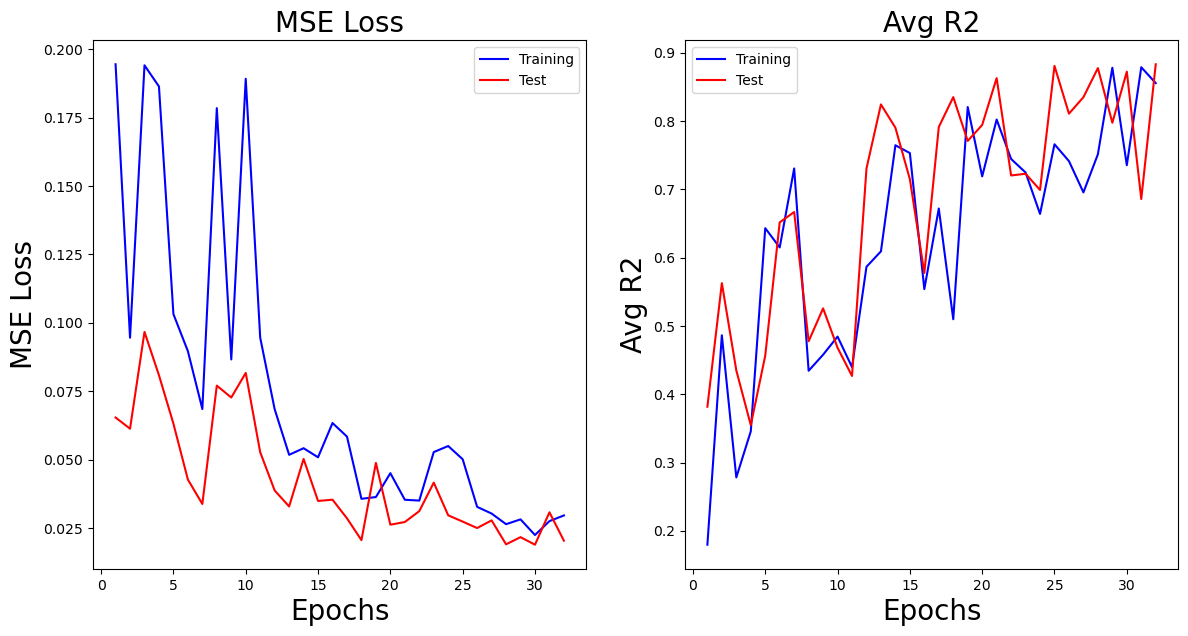

In [3]:
folder = 'results_default/'

plot_curves(folder,first_epoch=0,last_epoch = 32)

In [4]:
input_shape = (256,256)

model = make_model(FCN, input_shape)

epoch = 32

model.load_weights(os.path.join(folder,'training_results/weights/epoch-{}.h5'.format(epoch)))

Here 15 predictions are illustrated. Some of them are accurate with high R2, some of them are not with low R2. In some case atoms are predicted where they do not exist in the HRTEM image, being an indication of a non accurate prediction.

R2: 0.334
R2: 0.380
R2: 0.875
R2: 0.898
R2: 0.421
R2: 0.360
R2: 0.614
R2: 0.876
R2: 0.353
R2: 0.844
R2: 0.893
R2: 0.527
R2: 0.946
R2: 0.833
R2: 0.939


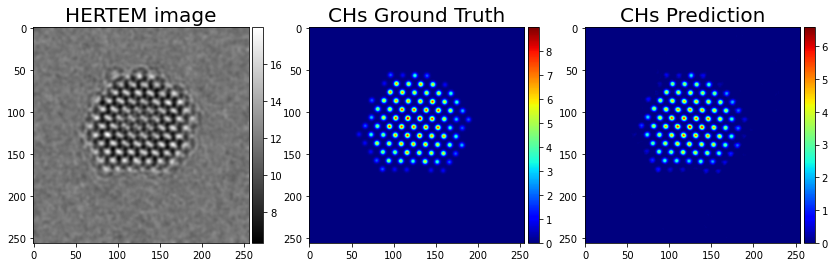

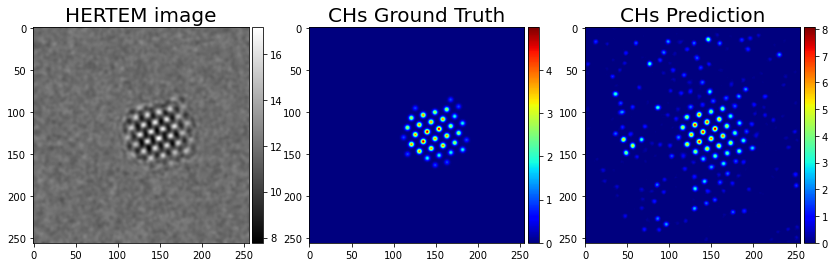

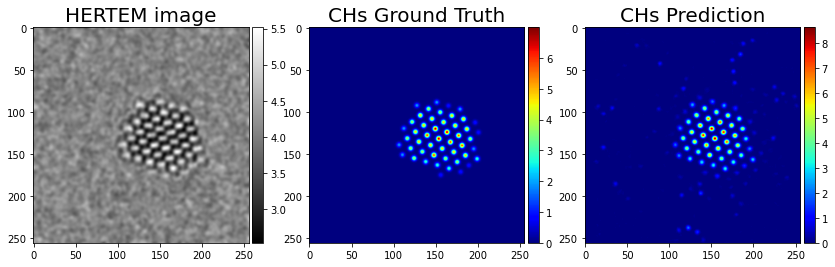

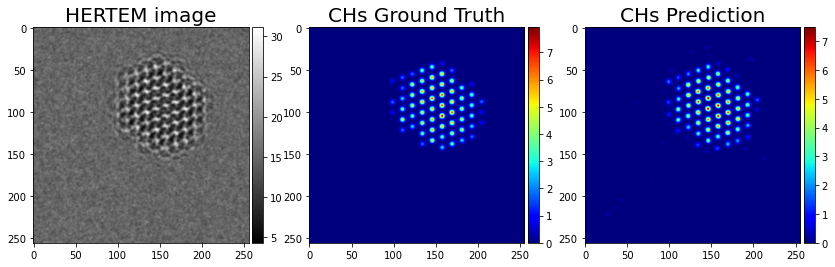

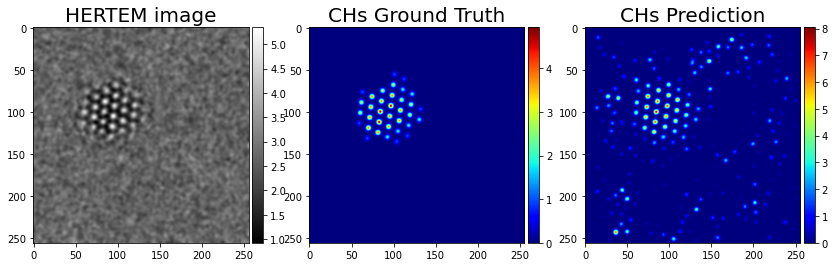

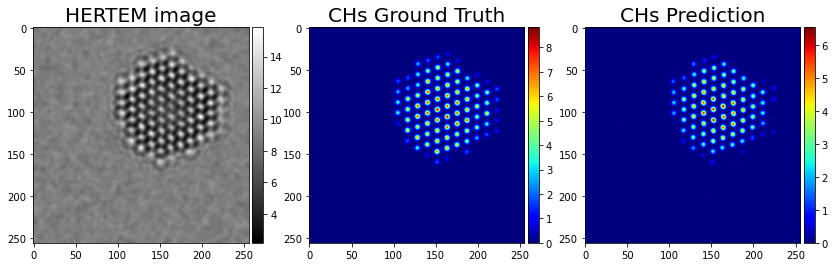

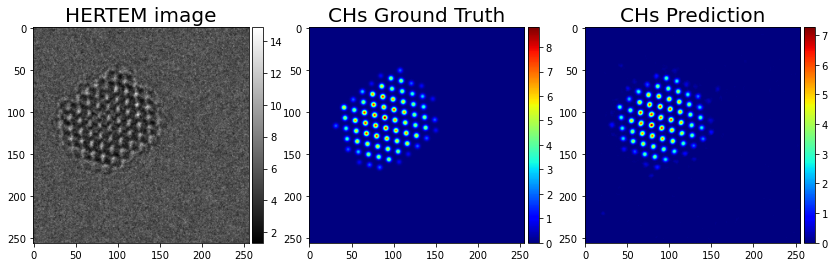

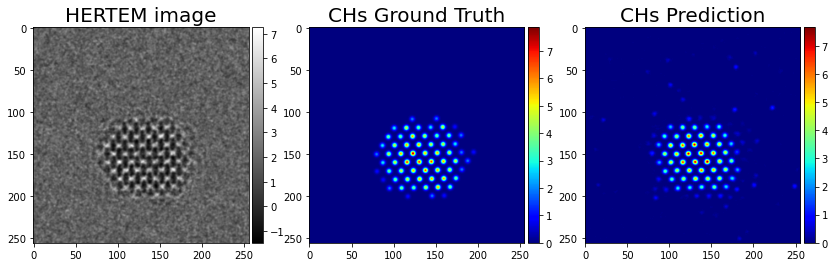

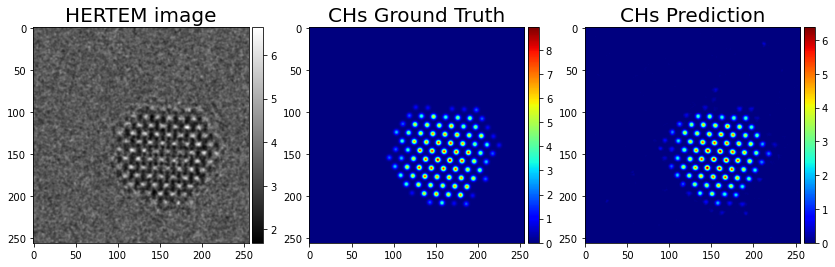

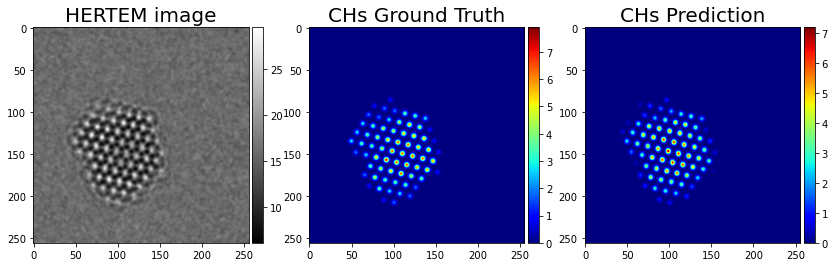

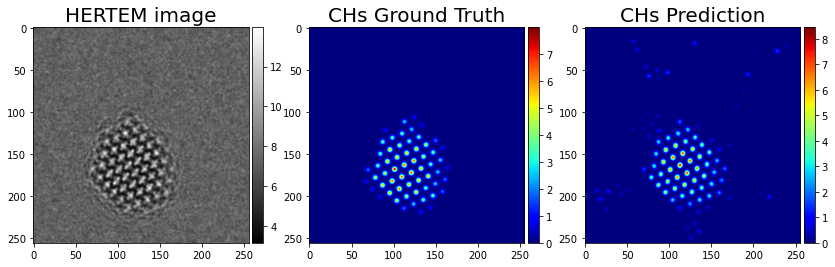

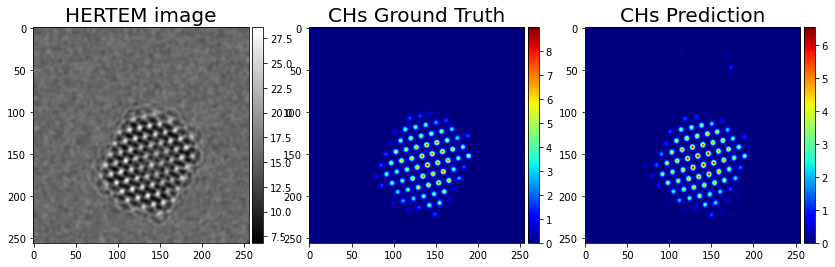

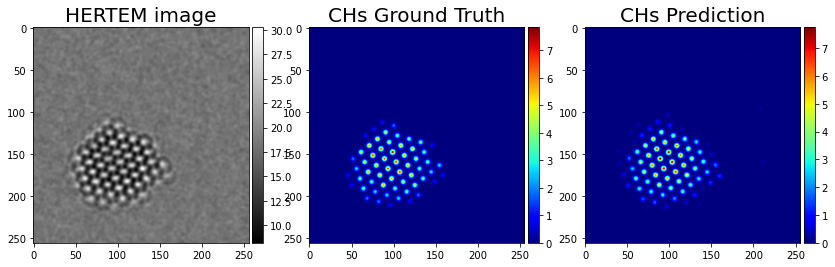

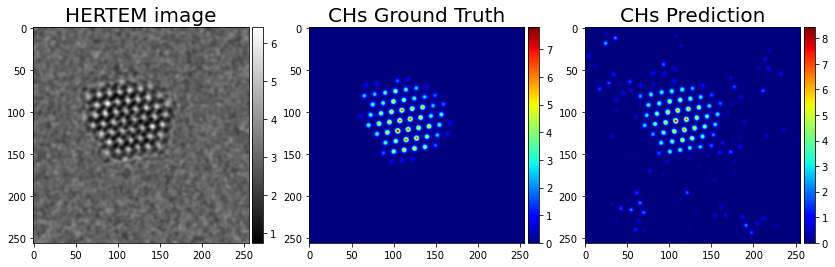

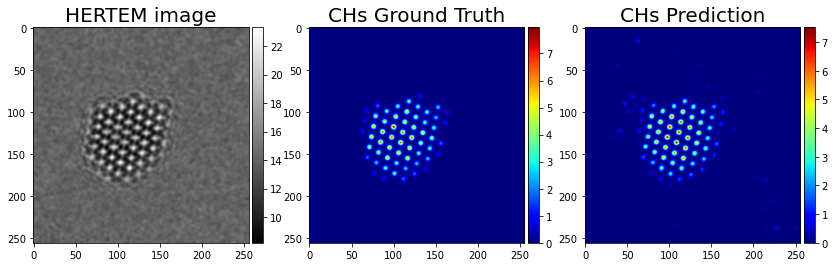

In [5]:
for i in range(5,20):

    data = np.load('../training_data/data/data_{}.npy'.format(i))

    img = data[:,:,:,0]
    img = img.reshape(img.shape + (1,))

    lbl = data[:,:,:,1]
    lbl = lbl.reshape(lbl.shape + (1,))

    rnd_imgng = Random_Imaging(image=img,labels=lbl)
    img,lbl = rnd_imgng.get_trasform()

    pred = model(img, training = True)

    plot_prediction(img,lbl,pred)
